<a href="https://colab.research.google.com/github/AmirJlr/Thesis/blob/master/Fingerprints_Descriptors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image # show image in cells

!pip install rdkit
!pip install deepchem

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import warnings

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools, MACCSkeys, AtomPairs, rdFingerprintGenerator
from rdkit import DataStructs
from rdkit.Chem.rdmolops import PatternFingerprint
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem.AtomPairs.Pairs import GetAtomPairFingerprintAsBitVect
from rdkit.ML.Descriptors import MoleculeDescriptors

pd.set_option('display.max_rows', None)



from tqdm import tqdm

warnings.filterwarnings("ignore")

### Create an object of the molecule descriptor class

In [ ]:
df = pd.read_csv('Lipophilicity.csv')

In [ ]:
mol_list = []

for smile in df['smiles']:
    mol = Chem.MolFromSmiles(smile)
    mol = Chem.AddHs(mol)
    mol_list.append(mol)

df = pd.concat([df, pd.DataFrame(mol_list, columns = (['mol']))], axis=1)

In [ ]:
df.head(3)

,CMPD_CHEMBLID,exp,smiles,RDKIT_SMILES,mol
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14,Cn1c(CN2CCN(c3ccc(Cl)cc3)CC2)nc2ccccc21,<rdkit.Chem.rdchem.Mol object at 0x79aa01e33370>
1,CHEMBL1951080,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...,COc1cc(OC)c(S(=O)(=O)N2c3ccccc3CCC2C)cc1NC(=O)...,<rdkit.Chem.rdchem.Mol object at 0x79aa01e333e0>
2,CHEMBL1771,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl,COC(=O)[C@H](c1ccccc1Cl)N1CCc2sccc2C1,<rdkit.Chem.rdchem.Mol object at 0x79aa01e33450>


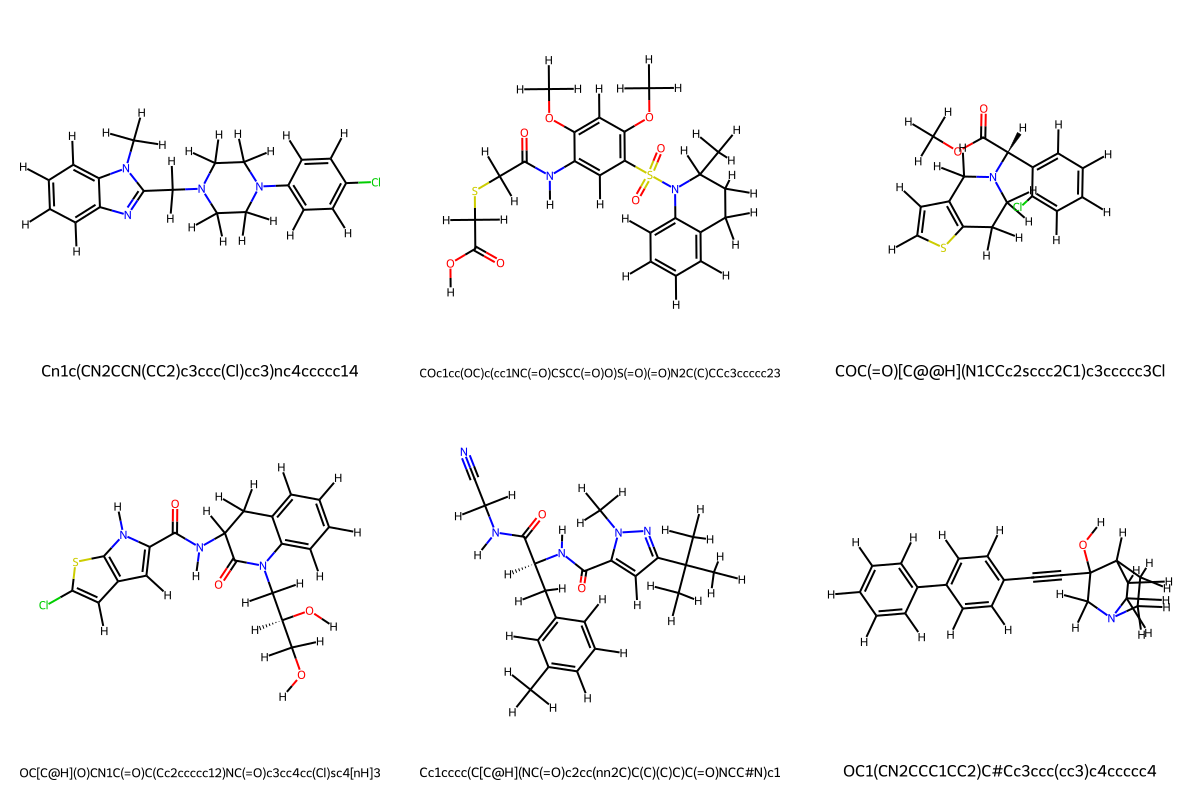

In [ ]:
# Draw.MolsToGridImage(df['mol'][:8],molsPerRow=4,subImgSize=(200,200))

Draw.MolsToGridImage(df['mol'][:6],molsPerRow=3,subImgSize=(400,400),legends=[x for x in df['smiles'][:8]])

# Integrated Classes :

In [ ]:
class FingerprintGenerator:
    def __init__(self, mol_column):
        # self.smiles_list = smiles_list
        # self.molecules = [Chem.MolFromSmiles(smile) for smile in smiles_list]
        self.molecules = mol_column

    def generate_maccs(self):
        maccs_fp = []
        for mol in tqdm(self.molecules, desc='Generating MACCS'):
            maccs_bitvector = MACCSkeys.GenMACCSKeys(mol)
            arr = np.zeros((0,), dtype=np.int8)
            DataStructs.ConvertToNumpyArray(maccs_bitvector, arr)
            maccs_fp.append(arr)
        return pd.DataFrame(maccs_fp)

    def generate_pattern(self):
        pattern_fp = []
        for mol in tqdm(self.molecules, desc='Generating Pattern'):
            pf_bitvector = Chem.PatternFingerprint(mol)
            arr = np.zeros((0,), dtype=np.int8)
            DataStructs.ConvertToNumpyArray(pf_bitvector, arr)
            pattern_fp.append(arr)
        return pd.DataFrame(pattern_fp)

    def generate_morgan(self, radius=1, nBits=2048):
        morgan_fp = []
        for mol in tqdm(self.molecules, desc='Generating Morgan'):
            mf_bitvector = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits)
            arr = np.zeros((0,), dtype=np.int8)
            DataStructs.ConvertToNumpyArray(mf_bitvector, arr)
            morgan_fp.append(arr)
        return pd.DataFrame(morgan_fp)

    def generate_ecfp(self, radius=2, nBits=2048):
        ecfp_fp = []
        for mol in tqdm(self.molecules, desc='Generating ECFP'):
            ecfp_bitvector = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits)
            arr = np.zeros((0,), dtype=np.int8)
            DataStructs.ConvertToNumpyArray(ecfp_bitvector, arr)
            ecfp_fp.append(arr)
        return pd.DataFrame(ecfp_fp)

    def generate_avalon(self, nBits=512):
        avalon_fp = []
        for mol in tqdm(self.molecules, desc='Generating Avalon'):
            af_bitvector = pyAvalonTools.GetAvalonFP(mol, nBits=nBits)
            arr = np.zeros((0,), dtype=np.int8)
            DataStructs.ConvertToNumpyArray(af_bitvector, arr)
            avalon_fp.append(arr)
        return pd.DataFrame(avalon_fp)

    def generate_rdkit(self, fpSize=4096):
        rdik_fp = []
        rdkgen = rdFingerprintGenerator.GetRDKitFPGenerator(fpSize=fpSize)
        for mol in tqdm(self.molecules, desc='Generating RDKit'):
            rdk_bitvector = rdkgen.GetFingerprint(mol)
            arr = np.zeros((0,), dtype=np.int8)
            DataStructs.ConvertToNumpyArray(rdk_bitvector, arr)
            rdik_fp.append(arr)
        return pd.DataFrame(rdik_fp)

    def generate_atom_pair(self, fpSize=4096):
        atom_pair_fp = []
        apgen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=fpSize)
        for mol in tqdm(self.molecules, desc='Generating Atom Pair'):
            apf_bitvector = apgen.GetFingerprint(mol)
            arr = np.zeros((0,), dtype=np.int8)
            DataStructs.ConvertToNumpyArray(apf_bitvector, arr)
            atom_pair_fp.append(arr)
        return pd.DataFrame(atom_pair_fp)

    def generate_topological_torsion(self, fpSize=2048):
        topological_torsion_fp = []
        ttgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=fpSize)
        for mol in tqdm(self.molecules, desc='Generating Topological Torsion'):
            ttf_bitvector = ttgen.GetFingerprint(mol)
            arr = np.zeros((0,), dtype=np.int8)
            DataStructs.ConvertToNumpyArray(ttf_bitvector, arr)
            topological_torsion_fp.append(arr)
        return pd.DataFrame(topological_torsion_fp)

In [ ]:
fp_gen = FingerprintGenerator(df['mol'])

maccs_df = fp_gen.generate_maccs()
pattern_df = fp_gen.generate_pattern()
morgan_df = fp_gen.generate_morgan()
ecfp_df = fp_gen.generate_ecfp()
avalon_df = fp_gen.generate_avalon()
rdkit_df = fp_gen.generate_rdkit()
atom_pair_df = fp_gen.generate_atom_pair()
topological_torsion_df = fp_gen.generate_topological_torsion()

Generating Topological Torsion: 100%|██████████| 4200/4200 [00:01<00:00, 3593.43it/s]


In [ ]:
class DescriptorGenerator:
    def __init__(self, mol_column):
        self.df = df
        self.molecules = mol_column

    def generate_rdkit_descriptors(self):
        Desc_list_func = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
        names = Desc_list_func.GetDescriptorNames()
        Des_func = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
        rdkit_descriptors = []

        for mol in tqdm(self.molecules, desc='Generating RDKit Descriptors'):
            rdkit_descriptors.append(Des_func.CalcDescriptors(mol))

        return pd.DataFrame(rdkit_descriptors, columns=names)


In [ ]:
# Generate descriptors
desc_gen = DescriptorGenerator(df['mol'])

rdkit_descriptors_df = desc_gen.generate_rdkit_descriptors()


Streaming output truncated to the last 5000 lines.
----------
****

[09:52:59] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 40 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/Descriptors/Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
----------
Stacktrace:
----------
****

[09:52:59] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 40 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/Descriptors/Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
----------
Stacktrace:
----------
****

[09:52:59] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 40 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/Descriptors/Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContrib

Failed to generate 3D coordinates for molecule: Bad Conformer Id


Generating ModRed Descriptors: 100%|██████████| 4200/4200 [33:47<00:00,  2.07it/s]


In [ ]:
rdkit_descriptors_df.head(3)

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,8.838871,8.838871,0.008322,-4.082382,0.728444,38.208333,340.858,319.690,340.145474,124,...,0,0,0,0,0,0,0,0,0,0
1,15.117958,15.117958,0.920611,-6.843264,0.545587,34.121212,494.591,468.383,494.118143,178,...,1,1,0,0,0,0,0,0,0,0
2,13.321227,13.321227,0.250582,-3.906276,0.807761,36.619048,321.829,305.701,321.059027,110,...,0,0,0,0,0,0,0,1,0,0


# **Fingerprints in Detail :**

### MACCS-keys

In [ ]:
# create an empty list
maccs_fp = []

# run a for loop to iterate through each molecule
for mol in tqdm(df['mol']):
    # generate bitvector object
    maccs_bitvector = MACCSkeys.GenMACCSKeys(mol)
    # create an empty array
    arr = np.zeros((0,), dtype=np.int8)
    # convert the RDKit explicit vectors into numpy arrays
    DataStructs.ConvertToNumpyArray(maccs_bitvector,arr)
    # append the array to the empty list
    maccs_fp.append(arr)

MACCS = pd.concat([df, pd.DataFrame(maccs_fp)], axis=1)

100%|██████████| 4200/4200 [00:06<00:00, 601.34it/s]


In [ ]:
MACCS.head(1)

,CMPD_CHEMBLID,exp,smiles,RDKIT_SMILES,mol,0,1,2,3,4,...,157,158,159,160,161,162,163,164,165,166
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14,Cn1c(CN2CCN(c3ccc(Cl)cc3)CC2)nc2ccccc21,<rdkit.Chem.rdchem.Mol object at 0x7f1365c6bd80>,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0


In [ ]:
sum(list(MACCS.iloc[0, 5:]))

48

### Pattern Figerprints

In [ ]:
pattern_fp = []

for mol in tqdm(df['mol']):
    pf_bitvector = PatternFingerprint(mol)
    arr = np.zeros((0,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(pf_bitvector,arr)
    pattern_fp.append(arr)

PATTERN = pd.concat([df, pd.DataFrame(pattern_fp)], axis=1)

100%|██████████| 4200/4200 [00:12<00:00, 346.28it/s]


In [ ]:
PATTERN.head(1)

,CMPD_CHEMBLID,exp,smiles,RDKIT_SMILES,mol,0,1,2,3,4,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14,Cn1c(CN2CCN(c3ccc(Cl)cc3)CC2)nc2ccccc21,<rdkit.Chem.rdchem.Mol object at 0x7f1365c6bd80>,0,1,1,1,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
sum(list(PATTERN.iloc[0, 5:]))

934

### Morgan Fingerprint

In [ ]:
morgan_fp = []

for mol in tqdm(df['mol']):
    mf_bitvector = AllChem.GetMorganFingerprintAsBitVect(mol, radius=1, nBits = 2048)
    arr = np.zeros((0,), dtype=np.int8)
    # convert the RDKit explicit vectors into numpy arrays
    DataStructs.ConvertToNumpyArray(mf_bitvector,arr)
    morgan_fp.append(arr)

MORGAN = pd.concat([df, pd.DataFrame(morgan_fp)], axis=1)

100%|██████████| 4200/4200 [00:00<00:00, 6049.40it/s]


In [ ]:
MORGAN.head(1)

,CMPD_CHEMBLID,exp,smiles,RDKIT_SMILES,mol,0,1,2,3,4,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14,Cn1c(CN2CCN(c3ccc(Cl)cc3)CC2)nc2ccccc21,<rdkit.Chem.rdchem.Mol object at 0x7f1365c6bd80>,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Extended Connectivity Circular Fingerprint (ECFP)

In [ ]:
ecfp_fp = []
for mol in tqdm(df['mol']):
    ecfp_bitvector = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits = 2048)
    arr = np.zeros((0,), dtype=np.int8)
    # convert the RDKit explicit vectors into numpy arrays
    DataStructs.ConvertToNumpyArray(ecfp_bitvector,arr)
    ecfp_fp.append(arr)

ECFP = pd.concat([df, pd.DataFrame(ecfp_fp)], axis=1)

100%|██████████| 4200/4200 [00:01<00:00, 3922.65it/s]


In [ ]:
ECFP.head(1)

,CMPD_CHEMBLID,exp,smiles,RDKIT_SMILES,mol,0,1,2,3,4,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14,Cn1c(CN2CCN(c3ccc(Cl)cc3)CC2)nc2ccccc21,<rdkit.Chem.rdchem.Mol object at 0x7f1365c6bd80>,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Avalon Fingerprint

In [ ]:
avalon_fp = []

for mol in tqdm(df['mol']):
    af_bitvector = pyAvalonTools.GetAvalonFP(mol, nBits=512)
    arr = np.zeros((0,), dtype=np.int8)
    # convert the RDKit explicit vectors into numpy arrays
    DataStructs.ConvertToNumpyArray(af_bitvector,arr)
    avalon_fp.append(arr)

AVALON = pd.concat([df, pd.DataFrame(avalon_fp)], axis=1)

100%|██████████| 4200/4200 [00:18<00:00, 223.99it/s]


In [ ]:
AVALON.head(1)

,CMPD_CHEMBLID,exp,smiles,RDKIT_SMILES,mol,0,1,2,3,4,...,502,503,504,505,506,507,508,509,510,511
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14,Cn1c(CN2CCN(c3ccc(Cl)cc3)CC2)nc2ccccc21,<rdkit.Chem.rdchem.Mol object at 0x7f1365c6bd80>,1,0,0,0,0,...,0,0,1,0,0,1,1,0,1,1


### RDKit Fingerprint

In [ ]:
rdik_fp = []
rdkgen = rdFingerprintGenerator.GetRDKitFPGenerator(fpSize=4096)

for mol in tqdm(df['mol']):
    rdk_bitvector = rdkgen.GetFingerprint(mol)

    # convert the RDKit explicit vectors into numpy arrays
    arr = np.array(rdk_bitvector)
    rdik_fp.append(arr)

RDKIT = pd.concat([df, pd.DataFrame(rdik_fp)], axis=1)

100%|██████████| 4200/4200 [00:58<00:00, 71.41it/s]


In [ ]:
RDKIT.head(1)

,CMPD_CHEMBLID,exp,smiles,RDKIT_SMILES,mol,0,1,2,3,4,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14,Cn1c(CN2CCN(c3ccc(Cl)cc3)CC2)nc2ccccc21,<rdkit.Chem.rdchem.Mol object at 0x7f1365c6bd80>,1,0,0,0,0,...,1,0,1,1,0,0,0,1,0,1


### Atom Pair Fingerprint

In [ ]:
# create an empty list
atom_pair_fp = []

# run a for loop to iterate through each molecule
apgen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=4096)

for mol in tqdm(df['mol']):
    apf_bitvector = apgen.GetFingerprint(mol)

    # convert the RDKit explicit vectors into numpy arrays
    arr = np.array(apf_bitvector)
    atom_pair_fp.append(arr)

ATOMPAIR = pd.concat([df, pd.DataFrame(atom_pair_fp)], axis=1)

100%|██████████| 4200/4200 [00:14<00:00, 298.66it/s]


In [ ]:
ATOMPAIR.head(1)

,CMPD_CHEMBLID,exp,smiles,RDKIT_SMILES,mol,0,1,2,3,4,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14,Cn1c(CN2CCN(c3ccc(Cl)cc3)CC2)nc2ccccc21,<rdkit.Chem.rdchem.Mol object at 0x7f1365c6bd80>,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Topological Torsion Fingerprint

In [ ]:
topological_torsin_fp = []

ttgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=2048)
for mol in tqdm(df['mol']):
    ttf_bitvector = ttgen.GetFingerprint(mol)

    # convert the RDKit explicit vectors into numpy arrays
    arr = np.array(ttf_bitvector)
    topological_torsin_fp.append(arr)

TTF = pd.concat([df, pd.DataFrame(topological_torsin_fp)], axis=1)

100%|██████████| 4200/4200 [00:05<00:00, 731.98it/s]


In [ ]:
TTF.head(1)

,CMPD_CHEMBLID,exp,smiles,RDKIT_SMILES,mol,0,1,2,3,4,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14,Cn1c(CN2CCN(c3ccc(Cl)cc3)CC2)nc2ccccc21,<rdkit.Chem.rdchem.Mol object at 0x7f1365c6bd80>,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Descriptors in Detail :**

### Generating Molecular Descriptors Using RDKit

In [ ]:
# Create an instance of the class to print names and number of descriptors :
Desc_list_func = MoleculeDescriptors.MolecularDescriptorCalculator(x[0] for x in Descriptors._descList)

In [ ]:
# Call the instance to get names :
names = Desc_list_func.GetDescriptorNames

# Print the names of descriptors :
names

<bound method MolecularDescriptorCalculator.GetDescriptorNames of <rdkit.ML.Descriptors.MoleculeDescriptors.MolecularDescriptorCalculator object at 0x7f1363a5d7b0>>

In [ ]:
### Calculate all the descriptor for the whole dataset : ###
# create another instance for calculating molecular descriptors

Des_func = MoleculeDescriptors.MolecularDescriptorCalculator(x[0] for x in Descriptors._descList)

rdkit_descriptors = []

for mol in tqdm(df['mol']):
    rdkit_descriptors.append(Des_func.CalcDescriptors(mol))

RDKitDescriptors = pd.concat([df, pd.DataFrame(rdkit_descriptors, columns=(x[0] for x in Descriptors._descList))], axis=1)

Streaming output truncated to the last 5000 lines.
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
----------
Stacktrace:
----------
****

[07:55:47] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 40 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/Descriptors/Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
----------
Stacktrace:
----------
****

[07:55:47] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 40 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/Descriptors/Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
----------
Stacktrace:
----------
****

[07:55:47] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 40 in file /project/build/temp.linux-x86_64-cpy

In [ ]:
RDKitDescriptors.head(1)

,CMPD_CHEMBLID,exp,smiles,RDKIT_SMILES,mol,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14,Cn1c(CN2CCN(c3ccc(Cl)cc3)CC2)nc2ccccc21,<rdkit.Chem.rdchem.Mol object at 0x7f1365c6bd80>,8.838871,8.838871,0.008322,-4.082382,0.728444,...,0,0,0,0,0,0,0,0,0,0
